<a href="https://colab.research.google.com/github/gabcmartins/scripts_projeto_doc/blob/main/Statistics_but_make_it_right_laske.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
arquivo_saida = "/content/drive/MyDrive/Doutorado/dados_para_estistica_laske_diamondc80.tsv"

# Carrega seu arquivo (substitua o nome se for diferente)
tabela = pd.read_csv("/content/drive/MyDrive/Doutorado/dados_unificados_laske_com_grupo.tsv", sep="\t")

# Agrupa pela proteína e mantém Amostra e Grupo (assumindo que são iguais dentro do grupo)
tabela_agrupada = tabela.groupby(["Proteina", "Amostra", "Grupo"], as_index=False)["Abundância"].sum()

# Salva o resultado
tabela_agrupada.to_csv(arquivo_saida, sep="\t", index=False)

print(f"Arquivo gerado: {arquivo_saida}")


Arquivo gerado: /content/drive/MyDrive/Doutorado/dados_para_estistica_laske_diamondc80.tsv


In [ ]:
dados_estatistica= pd.read_csv('/content/drive/MyDrive/Doutorado/dados_para_estistica_laske_diamondc80.tsv', sep='\t')
dados_estatistica.head()

,Proteina,Amostra,Grupo,Abundância
0,GH101.ACJ81926.1,ERR9578200,ctrl,1.347310
1,GH101.ACJ81926.1,ERR9578229,ctrl,1.419223
2,GH101.ACJ81926.1,ERR9578261,ctrl,1.033633
3,GH101.ACJ81926.1,ERR9578317,alzmr,1.509312
4,GH101.ARJ50816.1,ERR9578200,ctrl,1.293453


In [ ]:

# Conta quantas amostras cada proteína tem em cada grupo
contagem = dados_estatistica.groupby(["Proteina", "Grupo"])["Amostra"].nunique().unstack(fill_value=0)
contagem.columns = contagem.columns.str.strip()

# Filtra proteínas com >=25 amostras em pelo menos um grupo
proteinas_filtradas = contagem[(contagem["ctrl"] >= 25) | (contagem["alzmr"] >= 25)].index

# Filtra o dataframe original
df_filtrado = dados_estatistica[dados_estatistica["Proteina"].isin(proteinas_filtradas)]

# Salva o arquivo filtrado
df_filtrado.to_csv('/content/drive/MyDrive/Doutorado/proteinas_filtradas_para_estatistica_diamondc80.tsv', sep='\t', index=False)

In [ ]:
import pandas as pd
from scipy.stats import mannwhitneyu

# Carrega o arquivo já filtrado
df = pd.read_csv('/content/drive/MyDrive/Doutorado/Laske/proteinas_filtradas_para_estatistica_diamondc80.tsv', sep='\t')

# Lista de proteínas únicas
proteinas = df["Proteina"].unique()

# Lista para guardar os resultados
resultados = []

# Loop para aplicar o teste de Mann-Whitney para cada proteína
for proteina in proteinas:
    dados = df[df["Proteina"] == proteina]
    pos = dados[dados["Grupo"].str.strip() == "alzmr"]["Abundância"]
    neg = dados[dados["Grupo"].str.strip() == "ctrl"]["Abundância"]

    # Aplica o teste apenas se ambos os grupos tiverem dados
    if len(pos) > 0 and len(neg) > 0:
        stat, pval = mannwhitneyu(pos, neg, alternative='two-sided')
        resultados.append({
            "Proteina": proteina,
            "n_alzmr": len(pos),
            "n_ctrl": len(neg),
            "median_azlmr": pos.median(),
            "median_ctrl": neg.median(),
            "p_valor": pval
        })

# Cria um DataFrame com os resultados
df_resultados = pd.DataFrame(resultados)
df_resultados = df_resultados.sort_values(by="p_valor", ascending=True)

# Salva o resultado
df_resultados.to_csv('/content/drive/MyDrive/Doutorado/Laske/resultado_estatisticas_laske_median.tsv', sep='\t', index=False)

print("Análise estatística concluída! Arquivo salvo como 'resultado_estatisticas_laske_median.tsv")

Análise estatística concluída! Arquivo salvo como 'resultado_estatisticas_laske_median.tsv


In [ ]:
import pandas as pd
est_median=pd.read_csv('/content/drive/MyDrive/Doutorado/Laske/resultado_estatisticas_laske_median.tsv', sep='\t')
est_median.head()

,Proteina,n_alzmr,n_ctrl,median_azlmr,median_ctrl,p_valor,familia
0,GH3.ATL90129.1,47,55,5.343832,3.714747,0.001078,GH3
1,GH3.QNM01487.1,54,66,4.988143,3.077772,0.001509,GH3
2,GH3.QUH30605.1,20,29,3.858661,2.201378,0.001921,GH3
3,GH2.BBL03117.1,30,44,2.128816,3.022695,0.002014,GH2
4,GH2.CBL35301.1,40,47,7.373714,3.982414,0.002200,GH2


In [ ]:
est_median["familia"] = est_median["Proteina"].str.extract(r"^(.*?)\.")
est_median.to_csv('/content/drive/MyDrive/Doutorado/Laske/resultado_estatisticas_laske_median.tsv', sep='\t', index=False)


In [ ]:
from statsmodels.stats.multitest import multipletests

def corrigir_fdr_por_familia(df):
    resultados = []
    for familia, grupo in df.groupby("familia"):
        pvals = grupo["p_valor"].values
        _, qvals, _, _ = multipletests(pvals, method='fdr_bh')
        grupo["q_valor"] = qvals
        resultados.append(grupo)
    return pd.concat(resultados, ignore_index=True)

est_corrigido = corrigir_fdr_por_familia(est_median)

# 6. Salva em novo arquivo
est_corrigido.to_csv('/content/drive/MyDrive/Doutorado/Laske/resultado_Laske_corrigido_FDR_por_familia.tsv', sep='\t', index=False)

In [ ]:
q_values= pd.read_csv('/content/drive/MyDrive/Doutorado/Laske/resultado_Laske_corrigido_FDR_por_familia.tsv', sep='\t')
q_values.head(10)

NameError: name 'pd' is not defined

In [ ]:
est_corrigido.sort_values(by="q_valor").to_csv('/content/drive/MyDrive/Doutorado/Laske/resultado_Laske_corrigido_FDR_por_familia.tsv', sep='\t', index=False)


In [ ]:
import pandas as pd

# Carrega o arquivo
df = pd.read_csv('/content/drive/MyDrive/Doutorado/dados_para_estistica.tsv', sep='\t')

# Remove espaços dos nomes dos grupos
df['Grupo'] = df['Grupo'].str.strip()

# Conta em quantas amostras cada proteína aparece em cada grupo
contagem = df.groupby(['Proteina', 'Grupo'])['Amostra'].nunique().unstack(fill_value=0)

# Filtra proteínas que aparecem em apenas um grupo com >= 10 amostras
exclusivas = contagem[((contagem['Positive'] >= 10) & (contagem['Negative'] == 0)) |
                      ((contagem['Negative'] >= 10) & (contagem['Positive'] == 0))]

# Salva o resultado
exclusivas.to_csv('/content/drive/MyDrive/Doutorado/proteinas_exclusivas_por_grupo.tsv', sep='\t')

print("Arquivo salvo com as proteínas exclusivas por grupo!")


Arquivo salvo com as proteínas exclusivas por grupo!


In [ ]:
import pandas as pd

In [ ]:
c80=pd.read_csv('/content/drive/MyDrive/Doutorado/resultado_estatisticas_CI_diamondc80.tsv', sep='\t')

In [ ]:
c80.head(20)

,Proteina,n_alzmr,n_ctrl,media_alzmr,media_ctrl,dif_media,IC95_dif_inf,IC95_dif_sup,p_valor
0,GH3.ATL90129.1,47,55,7.205158,4.255928,2.949230,1.340384,4.627715,0.001078
1,GH3.QNM01487.1,54,66,7.960164,4.340881,3.619284,1.583820,5.994085,0.001509
2,GH3.QUH30605.1,20,29,5.082978,3.070392,2.012586,0.088810,3.936370,0.001921
3,GH2.BBL03117.1,30,44,2.608628,4.612350,-2.003723,-3.289877,-0.934982,0.002014
4,GH2.CBL35301.1,40,47,9.248309,6.658651,2.589658,-0.582703,5.601863,0.002200
5,GH110.UWN61086.1,35,53,13.457516,6.681286,6.776229,1.491363,12.658886,0.002473
6,GH20.ACD04236.1,31,41,10.812171,5.685461,5.126710,1.334550,9.457182,0.003225
7,GH2.CBL34265.1,36,38,8.636521,6.648470,1.988051,-1.135874,4.890874,0.003562
8,GH109.XKL47341.1,33,46,10.925219,6.028277,4.896942,0.794853,9.384495,0.003760
9,GH2.BBL01555.1,18,31,15.597090,4.796019,10.801071,3.759626,19.000925,0.003815


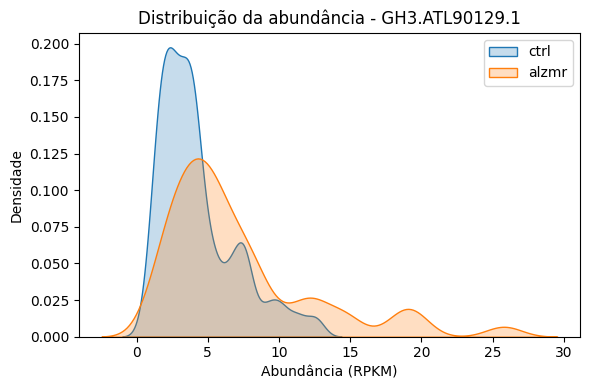

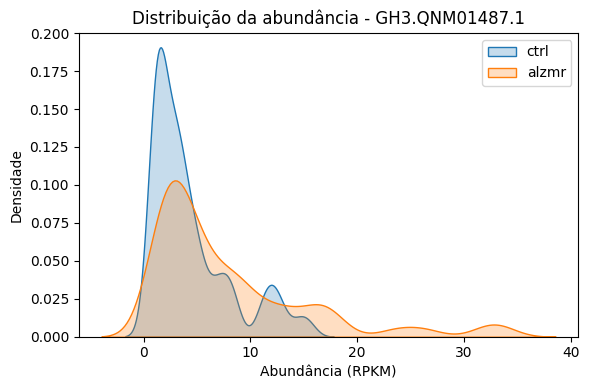

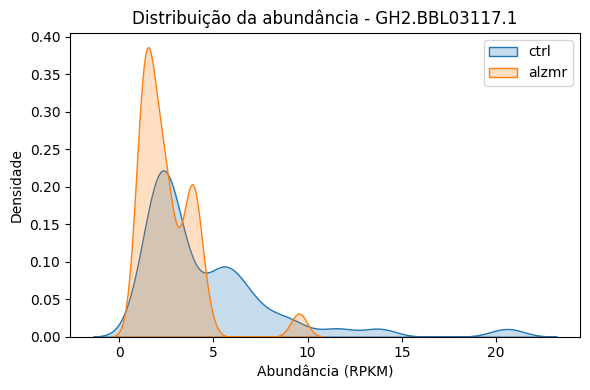

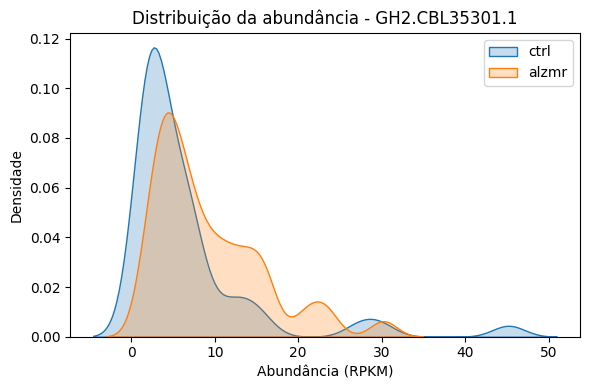

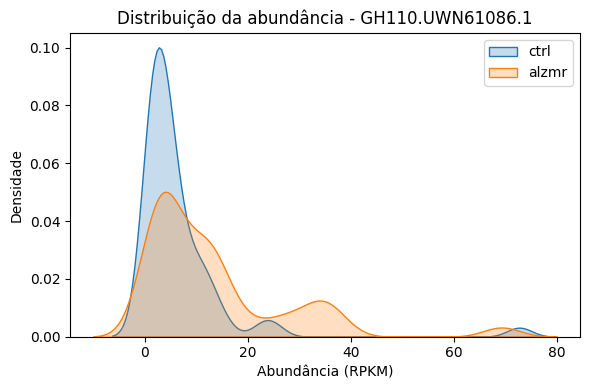

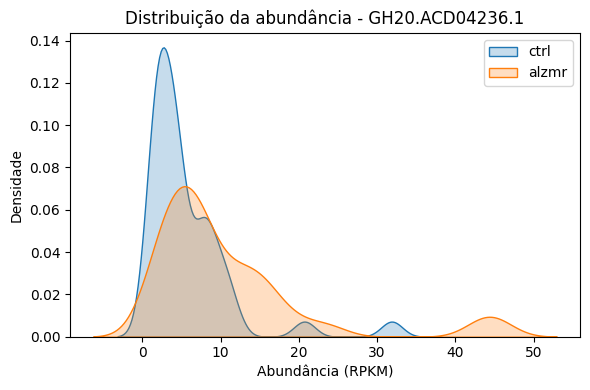

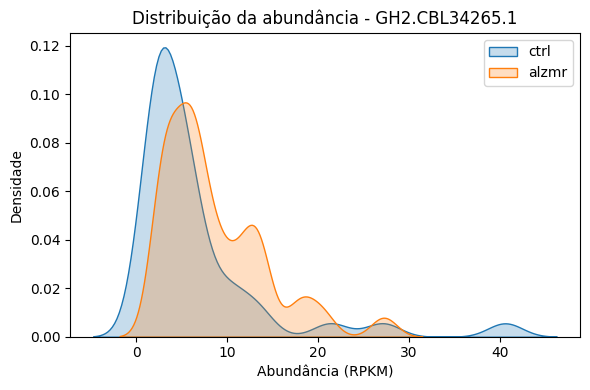

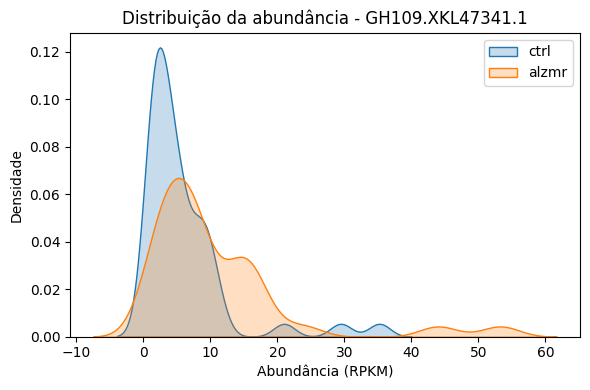

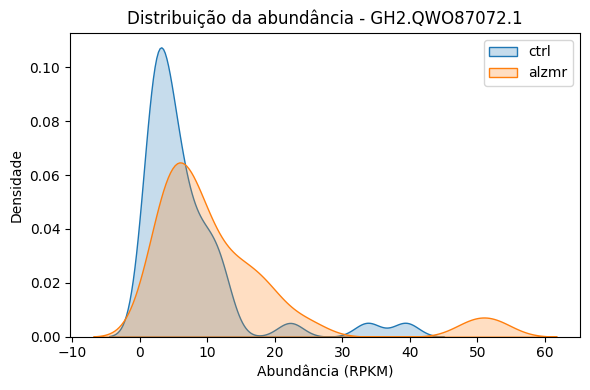

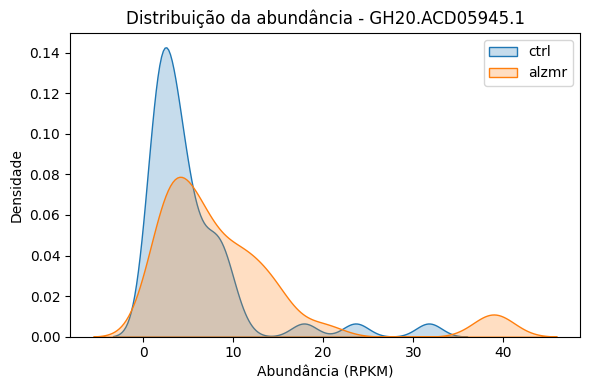

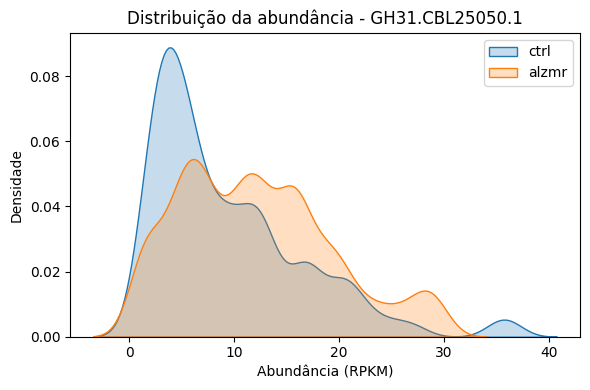

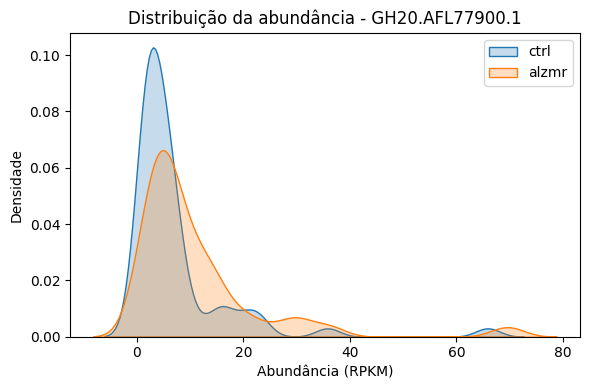

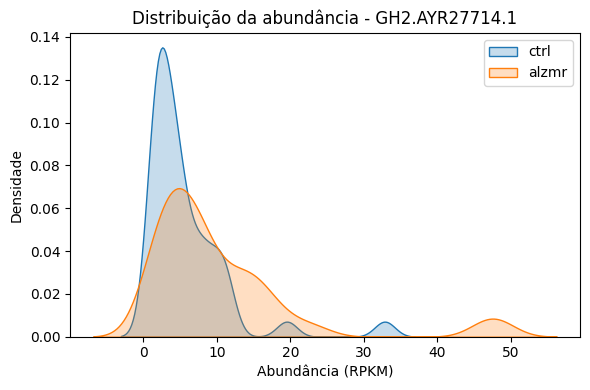

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Caminho do arquivo
caminho = '/content/drive/MyDrive/Doutorado/Laske/dados_para_estistica_laske_diamondc80.tsv'

# Carregar o arquivo
df = pd.read_csv(caminho, sep='\t')

# Lista de proteínas desejadas (as 13)
proteinas_interesse = [
    'GH3.ATL90129.1', 'GH3.QNM01487.1', 'GH2.BBL03117.1', 'GH2.CBL35301.1',
    'GH110.UWN61086.1', 'GH20.ACD04236.1', 'GH2.CBL34265.1', 'GH109.XKL47341.1',
    'GH2.QWO87072.1', 'GH20.ACD05945.1', 'GH31.CBL25050.1', 'GH20.AFL77900.1',
    'GH2.AYR27714.1'
]

# Filtrar o dataframe apenas com essas proteínas
df_filtrado = df[df['Proteina'].isin(proteinas_interesse)]

# Criar um gráfico para cada proteína por grupo
for proteina in proteinas_interesse:
    plt.figure(figsize=(6, 4))

    # Filtrar dados da proteína atual
    dados_proteina = df_filtrado[df_filtrado['Proteina'] == proteina]

    # Plotar distribuição para cada grupo
    sns.kdeplot(data=dados_proteina[dados_proteina['Grupo'] == 'ctrl'], bw_adjust=0.5, x='Abundância', fill=True, label='ctrl')
    sns.kdeplot(data=dados_proteina[dados_proteina['Grupo'] == 'alzmr'],bw_adjust=0.5, x='Abundância', fill=True, label='alzmr')

    # Título e ajustes
    plt.title(f'Distribuição da abundância - {proteina}')
    plt.xlabel('Abundância (RPKM)')
    plt.ylabel('Densidade')
    plt.legend()
    plt.tight_layout()
    plt.show()


<ipython-input-11-118f82160c28>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=dados_prot, x="Grupo", y="Abundância", jitter=0.2, palette={"alzmr": "red", "ctrl": "blue"}, alpha=0.7, size=5)


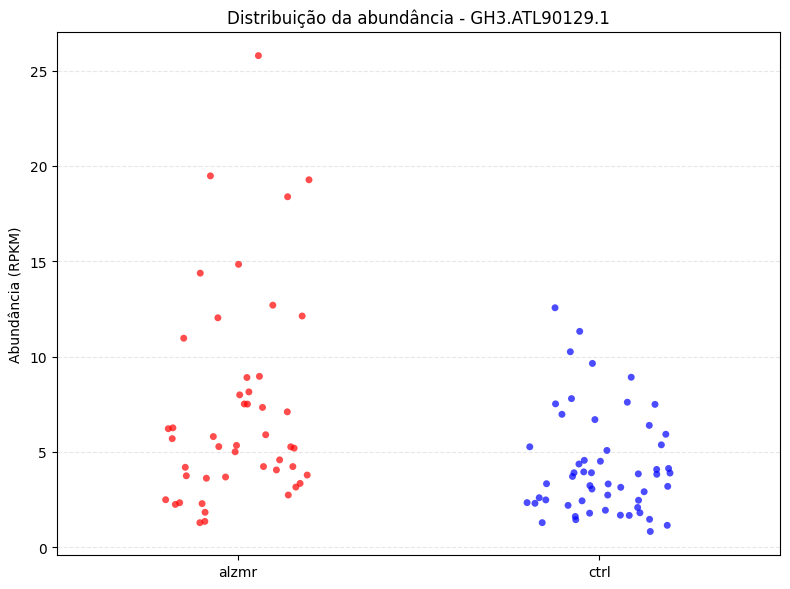

<ipython-input-11-118f82160c28>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=dados_prot, x="Grupo", y="Abundância", jitter=0.2, palette={"alzmr": "red", "ctrl": "blue"}, alpha=0.7, size=5)


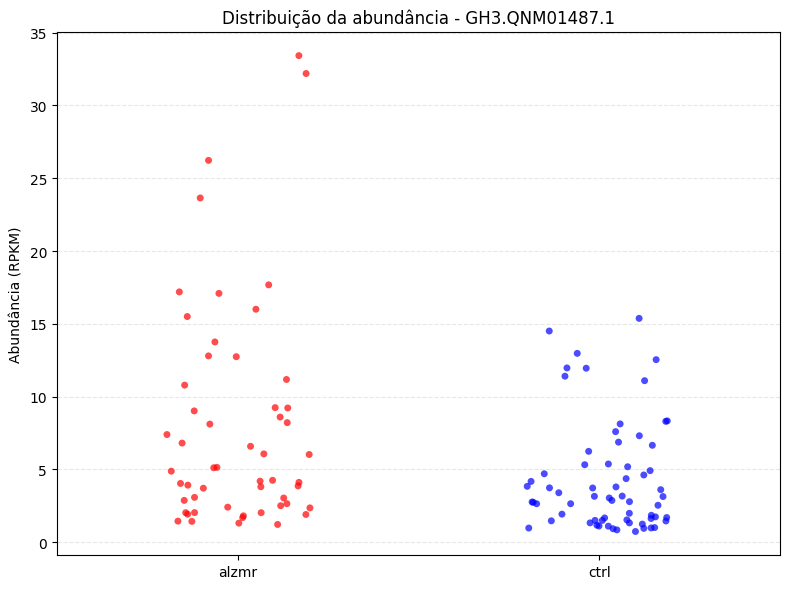

<ipython-input-11-118f82160c28>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=dados_prot, x="Grupo", y="Abundância", jitter=0.2, palette={"alzmr": "red", "ctrl": "blue"}, alpha=0.7, size=5)


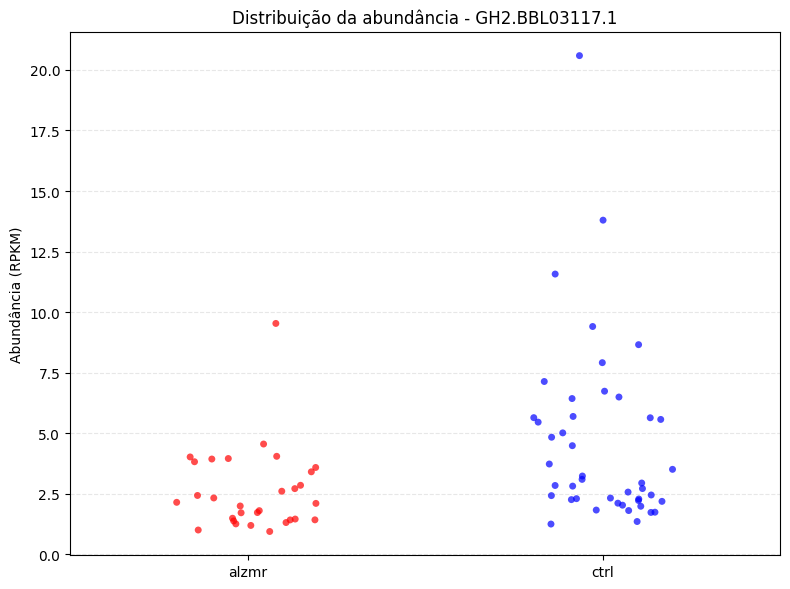

<ipython-input-11-118f82160c28>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=dados_prot, x="Grupo", y="Abundância", jitter=0.2, palette={"alzmr": "red", "ctrl": "blue"}, alpha=0.7, size=5)


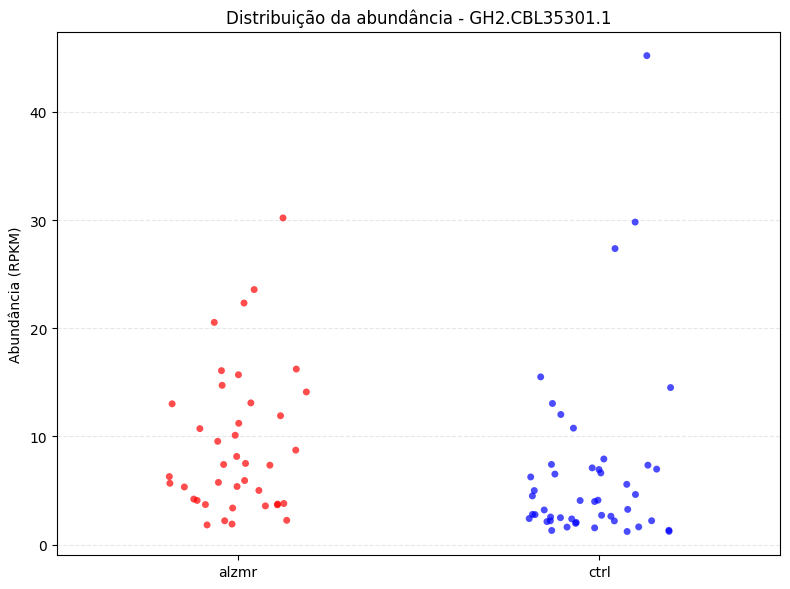

<ipython-input-11-118f82160c28>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=dados_prot, x="Grupo", y="Abundância", jitter=0.2, palette={"alzmr": "red", "ctrl": "blue"}, alpha=0.7, size=5)


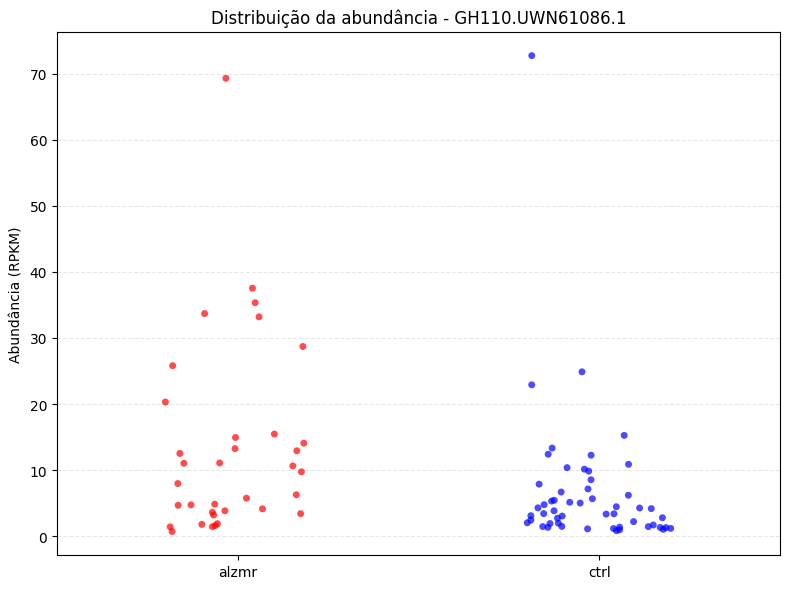

<ipython-input-11-118f82160c28>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=dados_prot, x="Grupo", y="Abundância", jitter=0.2, palette={"alzmr": "red", "ctrl": "blue"}, alpha=0.7, size=5)


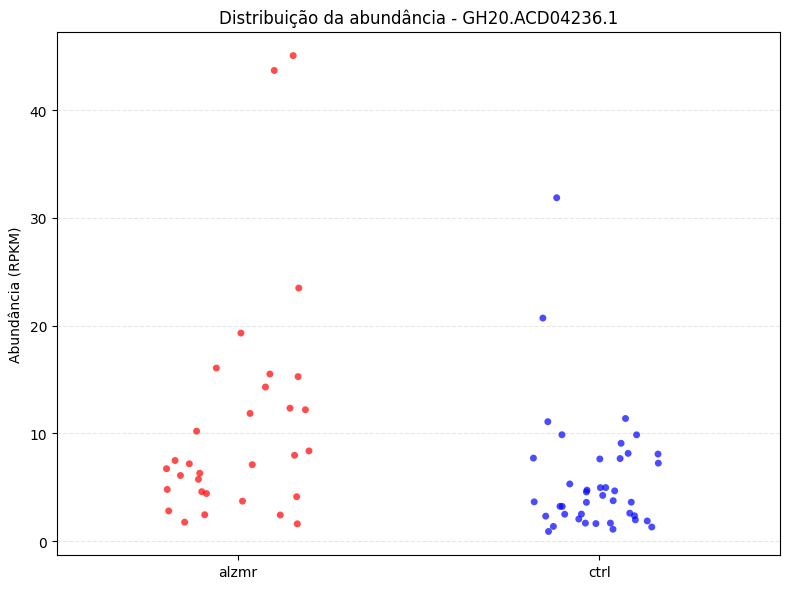

<ipython-input-11-118f82160c28>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=dados_prot, x="Grupo", y="Abundância", jitter=0.2, palette={"alzmr": "red", "ctrl": "blue"}, alpha=0.7, size=5)


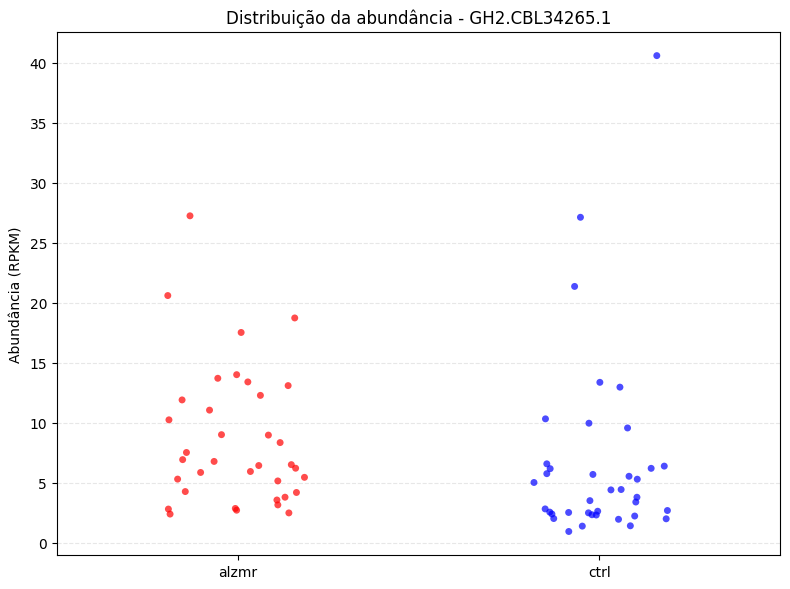

<ipython-input-11-118f82160c28>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=dados_prot, x="Grupo", y="Abundância", jitter=0.2, palette={"alzmr": "red", "ctrl": "blue"}, alpha=0.7, size=5)


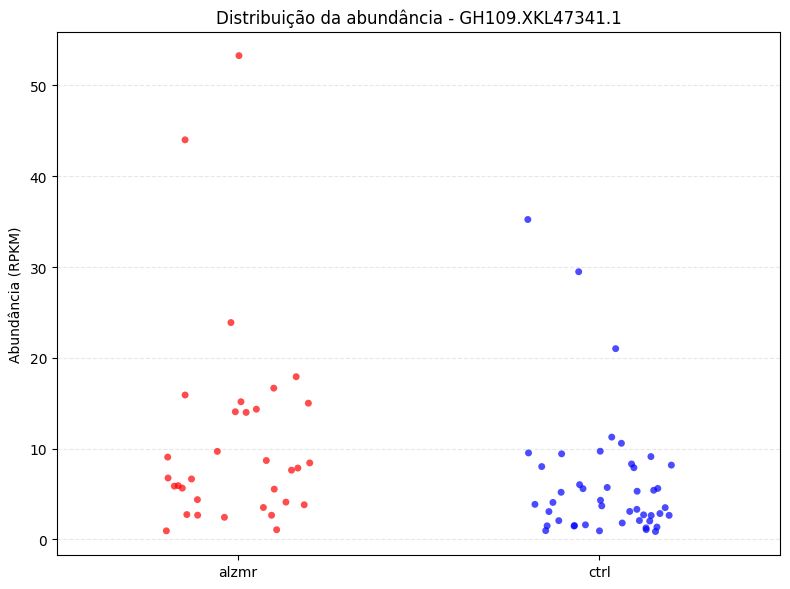

<ipython-input-11-118f82160c28>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=dados_prot, x="Grupo", y="Abundância", jitter=0.2, palette={"alzmr": "red", "ctrl": "blue"}, alpha=0.7, size=5)


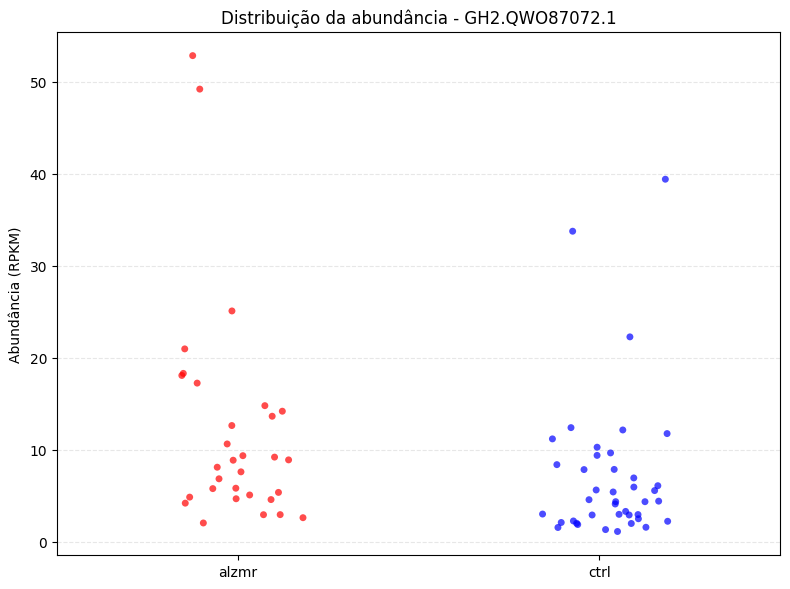

<ipython-input-11-118f82160c28>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=dados_prot, x="Grupo", y="Abundância", jitter=0.2, palette={"alzmr": "red", "ctrl": "blue"}, alpha=0.7, size=5)


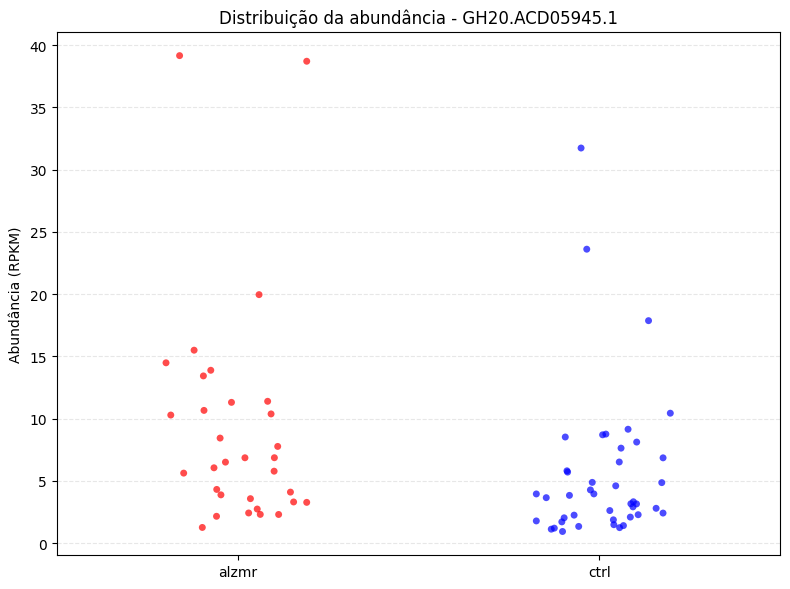

<ipython-input-11-118f82160c28>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=dados_prot, x="Grupo", y="Abundância", jitter=0.2, palette={"alzmr": "red", "ctrl": "blue"}, alpha=0.7, size=5)


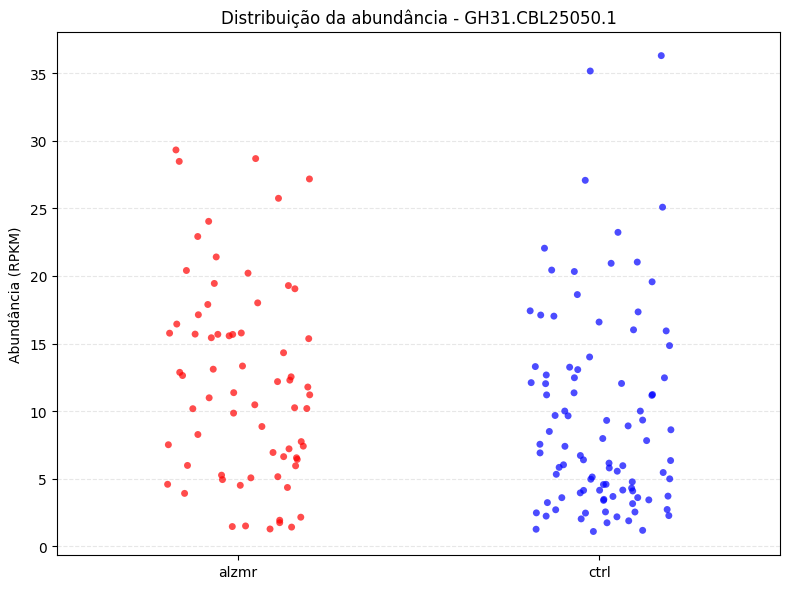

<ipython-input-11-118f82160c28>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=dados_prot, x="Grupo", y="Abundância", jitter=0.2, palette={"alzmr": "red", "ctrl": "blue"}, alpha=0.7, size=5)


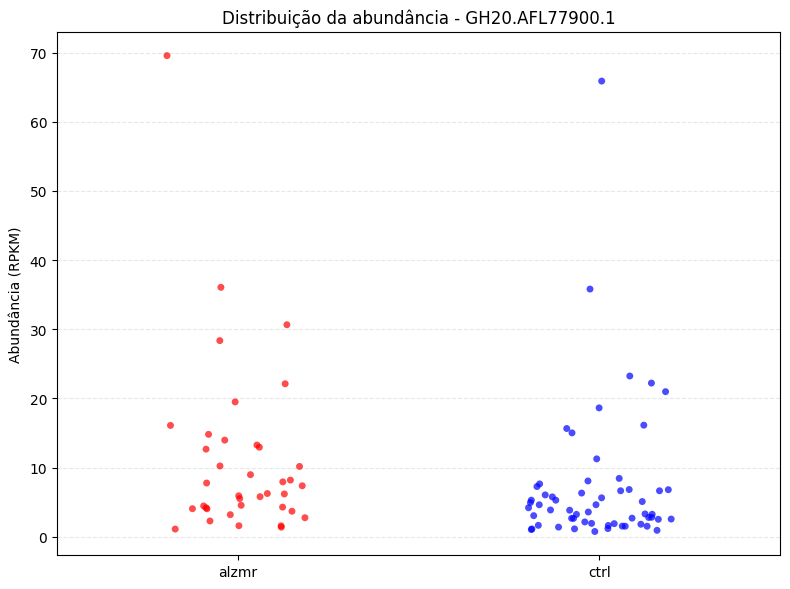

<ipython-input-11-118f82160c28>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=dados_prot, x="Grupo", y="Abundância", jitter=0.2, palette={"alzmr": "red", "ctrl": "blue"}, alpha=0.7, size=5)


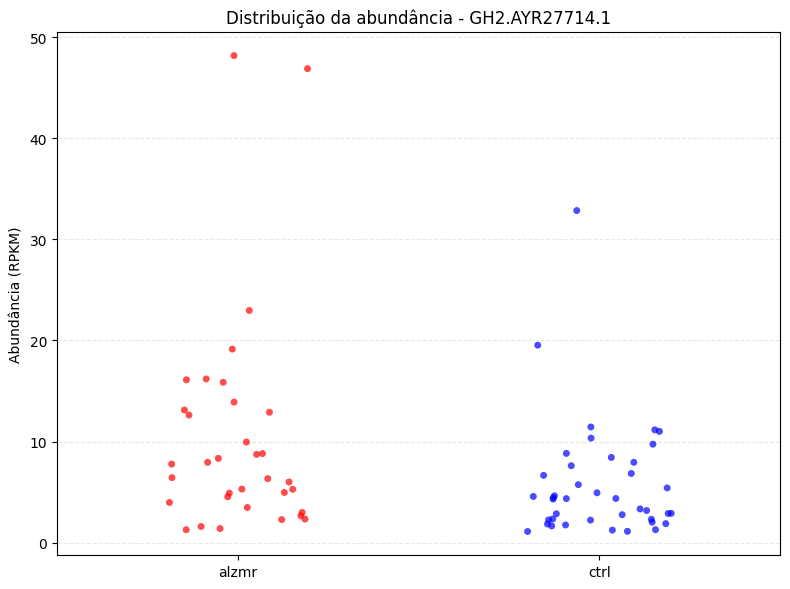

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

for proteina in proteinas_interesse:
    dados_prot = dados_estatistica[dados_estatistica["Proteina"] == proteina]

    plt.figure(figsize=(8, 6))
    sns.stripplot(data=dados_prot, x="Grupo", y="Abundância", jitter=0.2, palette={"alzmr": "red", "ctrl": "blue"}, alpha=0.7, size=5)

    plt.title(f"Distribuição da abundância - {proteina}")
    plt.ylabel("Abundância (RPKM)")
    plt.xlabel("")
    plt.tight_layout()
    plt.grid(True, axis='y', linestyle='--', alpha=0.3)

    plt.show()


In [ ]:
from statsmodels.stats.multitest import multipletests

def corrigir_fdr_global(df):
    pvals = df["p_valor"].values
    _, qvals, _, _ = multipletests(pvals, method='fdr_bh')
    df["q_valor"] = qvals
    return df

pvalue_corrigido= corrigir_fdr_global(est_median)
pvalue_corrigido.to_csv("/content/drive/MyDrive/Doutorado/Laske/resultado_estatisticas_laske_median_FDR.tsv", sep='\t')
print("Análise estatística concluída! Arquivo salvo como 'resultados_estatistica_laske_median_FDR.tsv")

Análise estatística concluída! Arquivo salvo como 'resultados_estatistica_laske_median_FDR.tsv
